
# Reconhecimento de Imagens com Redes Neurais Convolucionais 

## Introdução

Para começar, precisamos definir claramente o problema a ser resolvido e como vamos resolvê-lo.

Problema: Dada uma imagem, é homer ou o bart? 

A primeira coisa que precisamos é de muitas imagens de homer e bart, para poder treinar um algoritmo de Deep Learning. Usaremos, portanto, uma abordagem de aprendizagem supervisionada, onde apresentaremos ao algoritmo diversas imagens, devidamente marcadas como sendo imagens de homer e bart e então treinaremos o algoritmo. Ao final do treinamento, teremos um modelo que poderá receber novas imagens (desta vez não marcadas previamente) e então o modelo deverá ser capaz de classificar como sendo imagem de homer ou bart.

Para essa tarefa, usaremos uma arquitetura de Rede Neural Convolucional, a mesma que estudamos nos capítulos anteriores. Essa arquitetura usa métodos de convolução para poder prever características específicas de uma imagem de acordo com o que aprende em um conjunto de treinamento. Uma Rede Neural Convolucional procura muitos outros recursos baseados no que temos em um conjunto de treinamento.

Solução: Usar uma Rede Neural Convolucional para aprender recursos de imagens e assim prever se uma imagem contém Homer ou Bart.


## Definição dos Dados

Data Science, Deep Learning, Machine Learning, Inteligência Artificial. Nada disso faz sentido sem dados, muitos dados (por isso Big Data é cada vez mais importante nos dias de hoje). E para esta tarefa, teremos os seguintes dados:

Conjunto de dados de treino: Teremos 156 imagens para o conjunto de treinamento.

Conjunto de dados de validação: Teremos 40 imagens.

Conjunto de dados de teste: Teremos 73 imagens.

Essa á uma questão onde os iniciantes tem muitas dúvidas. Por que precisamos de dados de treino, validação e teste? Usamos os dados de treino para treinar o algoritmo e então criar o modelo preditivo. Usamos os dados de validação, para avaliar o modelo durante o treinamento. Usamos os dados de teste para validar a performance do modelo já treinado, ou seja, apresentamos ao modelo dados que ele não viu durante o treinamento, a fim de garantir que ele é capaz de fazer previsões.

## Fonte dos Dados

Usaremos como fonte de dados, o dataset https://www.kaggle.com/datasets/williamu32/dataset-bart-or-homer/

## Construindo a Rede Neural Convolucional

Nossa rede é uma sequência de camadas e podemos usar o modelo sequencial oferecido pelo Keras, que possui as funções necessárias para construir cada camada de uma rede neural convolucional.

O primeiro passo é carregar os pacotes necessários, o que é feito nas células abaixo.

O Keras utiliza o TensorFlow como backend, pois na prática o Keras é apenas uma biblioteca para simplificar a complexidade do TensorFlow. Aqui estão as versões utilizadas:

In [35]:
import tensorflow as tf
print("Versão do TensorFlow:", tf.__version__)

Versão do TensorFlow: 2.15.0


In [36]:
import keras as K
print("Versão do Keras:", K.__version__)

Versão do Keras: 2.15.0


In [37]:
# Imports
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

Nós então inicializamos a nossa rede:

In [38]:
# Inicializando a Rede Neural Convolucional
classifier = Sequential()

In [39]:
# Primeira Camada de Convolução: Aumentando o número de filtros para 64
classifier.add(Conv2D(64, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Primeiro Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Segunda Camada de Convolução: Aumentando o número de filtros para 64
classifier.add(Conv2D(64, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Terceira Camada de Convolução: Novamente, 64 filtros
classifier.add(Conv2D(64, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening
classifier.add(Flatten())

# Full connection: Aumentando unidades na primeira camada densa
classifier.add(Dense(units = 256, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compilando a rede
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Neste ponto temos nossa rede construída. Precisamos agora treiná-la.

## Treinando a Rede Neural Convolucional

### Pré-Processamento

Com a rede criada, precisamos agora realizar o treinamento. Antes, porém, precisamos fazer algum pré-processamento nos dados, em nosso caso as imagens. Para essa tarefa, vamos usar a função ImageDataGenerator() do Keras e ajustar escala e zoom das imagens de treino e a escala das imagens de validação.

O pré-processamento dos dados é etapa crucial em qualquer projeto de Machine Learning e muitas técnicas podem ser usadas, sempre de acordo com os dados em mãos e o problema que estamos tentando resolver. Nos cursos da Data Science Academy ensinamos aos alunos uma variedade de técnicas.

In [40]:
# Criando os objetos train_datagen e validation_datagen com as regras de pré-processamento das imagens
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

validation_datagen = ImageDataGenerator(rescale = 1./255)

test_datagen = ImageDataGenerator(rescale = 1./255)

Aplicamos então os dois objetos criados anteriormente para pré-processar os dados de treino e de validação. Lembre-se: o tratamento aplicado aos dados de validação deve ser o mesmo tratamento aplicado aos dados de treino.

In [49]:
# Pré-processamento das imagens de treino e validação
training_set = train_datagen.flow_from_directory('dataset_treino',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

validation_set = validation_datagen.flow_from_directory('dataset_validation',
                                                        target_size = (64, 64),
                                                        batch_size = 32,
                                                        class_mode = 'binary')

test_set = test_datagen.flow_from_directory('dataset_teste',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 156 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


Found 73 images belonging to 2 classes.


In [53]:
# Executando o treinamento (esse processo pode levar bastante tempo, dependendo do seu computador)
classifier.fit_generator(training_set,
                         steps_per_epoch = 5,
                         epochs = 30,
                         validation_data = validation_set,
                         validation_steps = 2)

Epoch 1/30


C:\Users\biel1\AppData\Local\Temp\ipykernel_10428\3606179130.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  classifier.fit_generator(training_set,


5/5 [==============================] - 1s 102ms/step - loss: 0.5388 - accuracy: 0.7179 - val_loss: 0.5302 - val_accuracy: 0.7750
Epoch 2/30
5/5 [==============================] - 0s 89ms/step - loss: 0.4879 - accuracy: 0.7564 - val_loss: 0.5210 - val_accuracy: 0.7750
Epoch 3/30
5/5 [==============================] - 0s 89ms/step - loss: 0.4445 - accuracy: 0.8077 - val_loss: 0.4774 - val_accuracy: 0.8250
Epoch 4/30
5/5 [==============================] - 0s 90ms/step - loss: 0.4197 - accuracy: 0.8077 - val_loss: 0.4833 - val_accuracy: 0.7750
Epoch 5/30
5/5 [==============================] - 0s 90ms/step - loss: 0.3754 - accuracy: 0.8333 - val_loss: 0.4603 - val_accuracy: 0.8000
Epoch 6/30
5/5 [==============================] - 1s 118ms/step - loss: 0.3379 - accuracy: 0.8590 - val_loss: 0.7328 - val_accuracy: 0.8000
Epoch 7/30
5/5 [==============================] - 1s 106ms/step - loss: 0.3827 - accuracy: 0.7756 - val_loss: 0.3817 - val_accuracy: 0.8250
Epoch 8/30
5/5 [===================

In [54]:
loss, accuracy = classifier.evaluate(test_set)
print("Precisão no conjunto de teste:", accuracy)

3/3 [==============================] - 0s 18ms/step - loss: 0.6004 - accuracy: 0.9041
Precisão no conjunto de teste: 0.9041095972061157


In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

def criar_datasets(train_ratio=0.8):
    base_dir = 'dataset_treino'
    classes = ['bart', 'homer']
    for cls in classes:
        source_dir = os.path.join(base_dir, cls)  # Atualiza o caminho para incluir dataset_treino
        if not os.path.exists(source_dir) or not os.path.isdir(source_dir):
            print(f"A pasta '{source_dir}' não existe ou não é um diretório.")
            continue

        dest_train_dir = os.path.join('dataset_treino', cls)
        dest_val_dir = os.path.join('dataset_validation', cls)
        os.makedirs(dest_val_dir, exist_ok=True)  # Cria apenas a pasta de validação

        all_files = os.listdir(source_dir)
        print(f"Processando {len(all_files)} arquivos da classe '{cls}'.")

        _, val_files = train_test_split(all_files, train_size=train_ratio)  # Separa os arquivos de validação
        print(f"Validação: {len(val_files)} para a classe '{cls}'.")

        for file in val_files:
            shutil.move(os.path.join(source_dir, file), dest_val_dir)  # Move os arquivos para a pasta de validação

criar_datasets()

## Fazendo Previsões

Vamos agora testar nosso modelo treinado com imagens que ele ainda não viu e que estão nos dados de teste.

Para cada imagem de teste, carregamos as imagens com as mesmas dimensões usadas nas imagens de treino. Na sequência convertemos as imagens em um array e expandimos as dimensões. Então apresentamos as imagens ao classificador treinado nos passos anteriores. Por fim, verificamos o resultado da previsão e emitimos a informação se a imagem é de um Homer ou Bart.

1/1 [==============================] - 0s 103ms/step


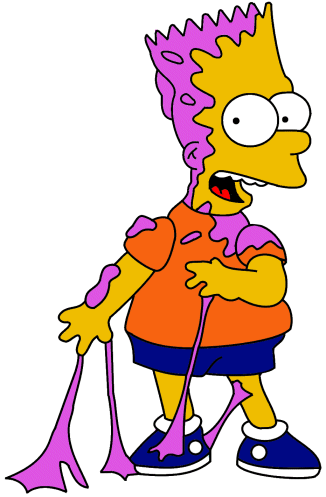

In [ ]:
# Primeira Imagem
import numpy as np
from keras.preprocessing import image

test_image = image.load_img('dataset_teste/bart/bart1.bmp', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices

if result[0][0] == 1:
    prediction = 'Homer'
else:
    prediction = 'Bart'

Image.open('dataset_teste/bart/bart1.bmp')

In [ ]:
# Previsão da primeira imagem
prediction

'Bart'

1/1 [==============================] - 0s 23ms/step


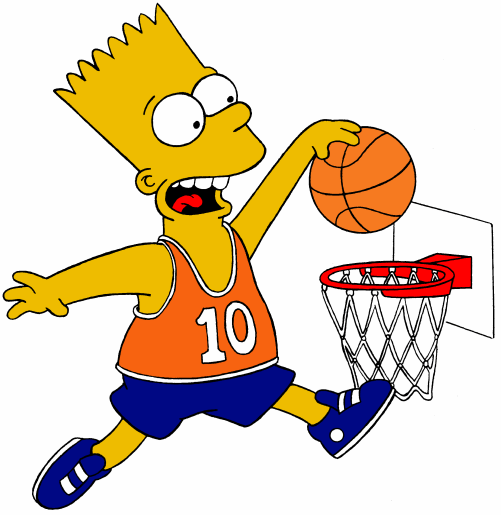

In [ ]:
# Segunda Imagem
test_image = image.load_img('dataset_teste/bart/bart2.bmp', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices

if result[0][0] == 1:
    prediction = 'Homer'
else:
    prediction = 'Bart'

Image.open('dataset_teste/bart/bart2.bmp')

In [ ]:
# Previsão da segunda imagem
prediction

'Bart'

Nosso modelo acertou mais uma!


1/1 [==============================] - 0s 22ms/step


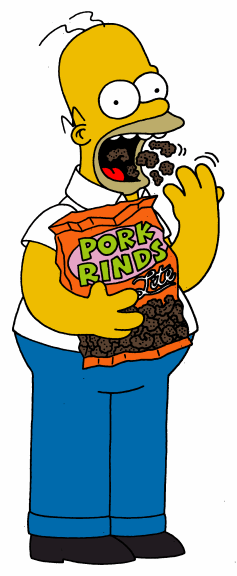

In [ ]:
# Terceira Imagem
test_image = image.load_img('dataset_teste/homer/homer1.bmp', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices

if result[0][0] == 1:
    prediction = 'Homer'
else:
    prediction = 'Bart'

Image.open('dataset_teste/homer/homer1.bmp')

In [ ]:
# Previsão da terceira imagem
prediction

'Bart'

Nosso modelo está impossível. Acertou novamente! :-)

1/1 [==============================] - 0s 52ms/step


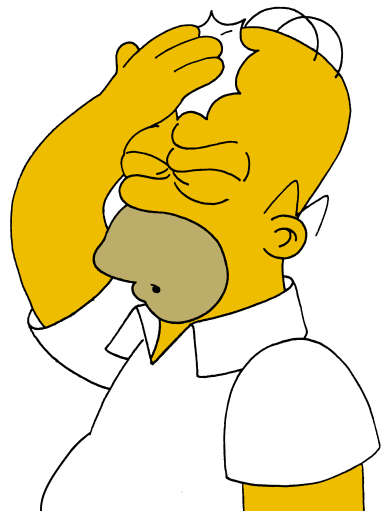

In [ ]:
# Quarta imagem
test_image = image.load_img('dataset_teste/homer/homer2.bmp', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices

if result[0][0] == 1:
    prediction = 'Homer'
else:
    prediction = 'Bart'

Image.open('dataset_teste/homer/homer2.bmp')

In [ ]:
# Previsão da quarta imagem
prediction

'Bart'

1/1 [==============================] - 0s 21ms/step


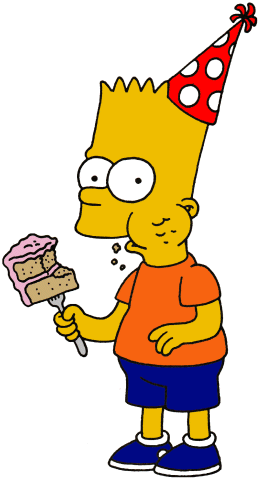

In [ ]:
# Quinta Imagem
test_image = image.load_img('dataset_teste/bart/bart3.bmp', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices

if result[0][0] == 1:
    prediction = 'Homer'
else:
    prediction = 'Bart'

Image.open('dataset_teste/bart/bart3.bmp')

In [ ]:
# Previsão da quinta imagem
prediction

'Bart'

1/1 [==============================] - 0s 22ms/step


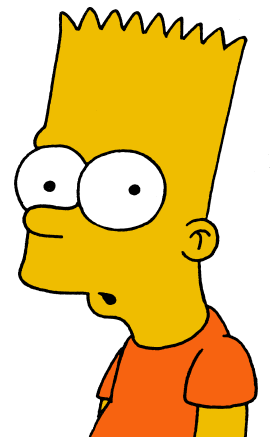

In [ ]:
# Sexta Imagem
test_image = image.load_img('dataset_teste/bart/bart4.bmp', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices

if result[0][0] == 1:
    prediction = 'Homer'
else:
    prediction = 'Bart'

Image.open('dataset_teste/bart/bart4.bmp')

In [ ]:
# Previsão da sexta imagem
prediction

'Bart'

E para encerrar, mais uma classificação correta do nosso modelo!